In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score,
                             precision_score ,recall_score , f1_score )
import xgboost as xgb

                             

In [2]:
# Load data
df=  pd.read_csv( r'C:\Users\Sony\Desktop\Telecom Customers Churn.csv')
print ( f"\nDataset Shape : {df.shape[0]} customerID, {df.shape[1]} feature")
print (df.head())

#Data Type and Missing values
print (df.info())
print (f"\nMissing Values:\n{df.isnull().sum()}")



Dataset Shape : 7043 customerID, 21 feature
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Str

In [3]:
print ("\n" + "="*80)
print ("KEY BUSINESS Metrics")
print ("="*80)

# Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True)['Yes']*100
print (f"\n Overall Churn Rate:{churn_rate:.2f}%")

# Customer Base Overview
print (f"\n Customer Base:")
print (f" -Total customers :{len(df):,} ")
print (f" -Churned customers :{df['Churn'].value_counts()['Yes']:,} ")
print (f" -Retained customers :{df['Churn'].value_counts()['No']:,} ")

# Revenue Impact Ananlysis
avg_monthly_charge= df['MonthlyCharges'].mean()
churned_revenue = df[df['Churn']=='Yes']['MonthlyCharges'].sum()
print(f"\n Revenue Ananlysis:")
print (f" -Average Monthly charge: ${avg_monthly_charge:.2f}")
print (f" -Monthly Revenue at risk: ${churned_revenue:.2f}")
print (f" -Annual Revenue at risk: ${churned_revenue*12:.2f}")









KEY BUSINESS Metrics

 Overall Churn Rate:26.54%

 Customer Base:
 -Total customers :7,043 
 -Churned customers :1,869 
 -Retained customers :5,174 

 Revenue Ananlysis:
 -Average Monthly charge: $64.76
 -Monthly Revenue at risk: $139130.85
 -Annual Revenue at risk: $1669570.20


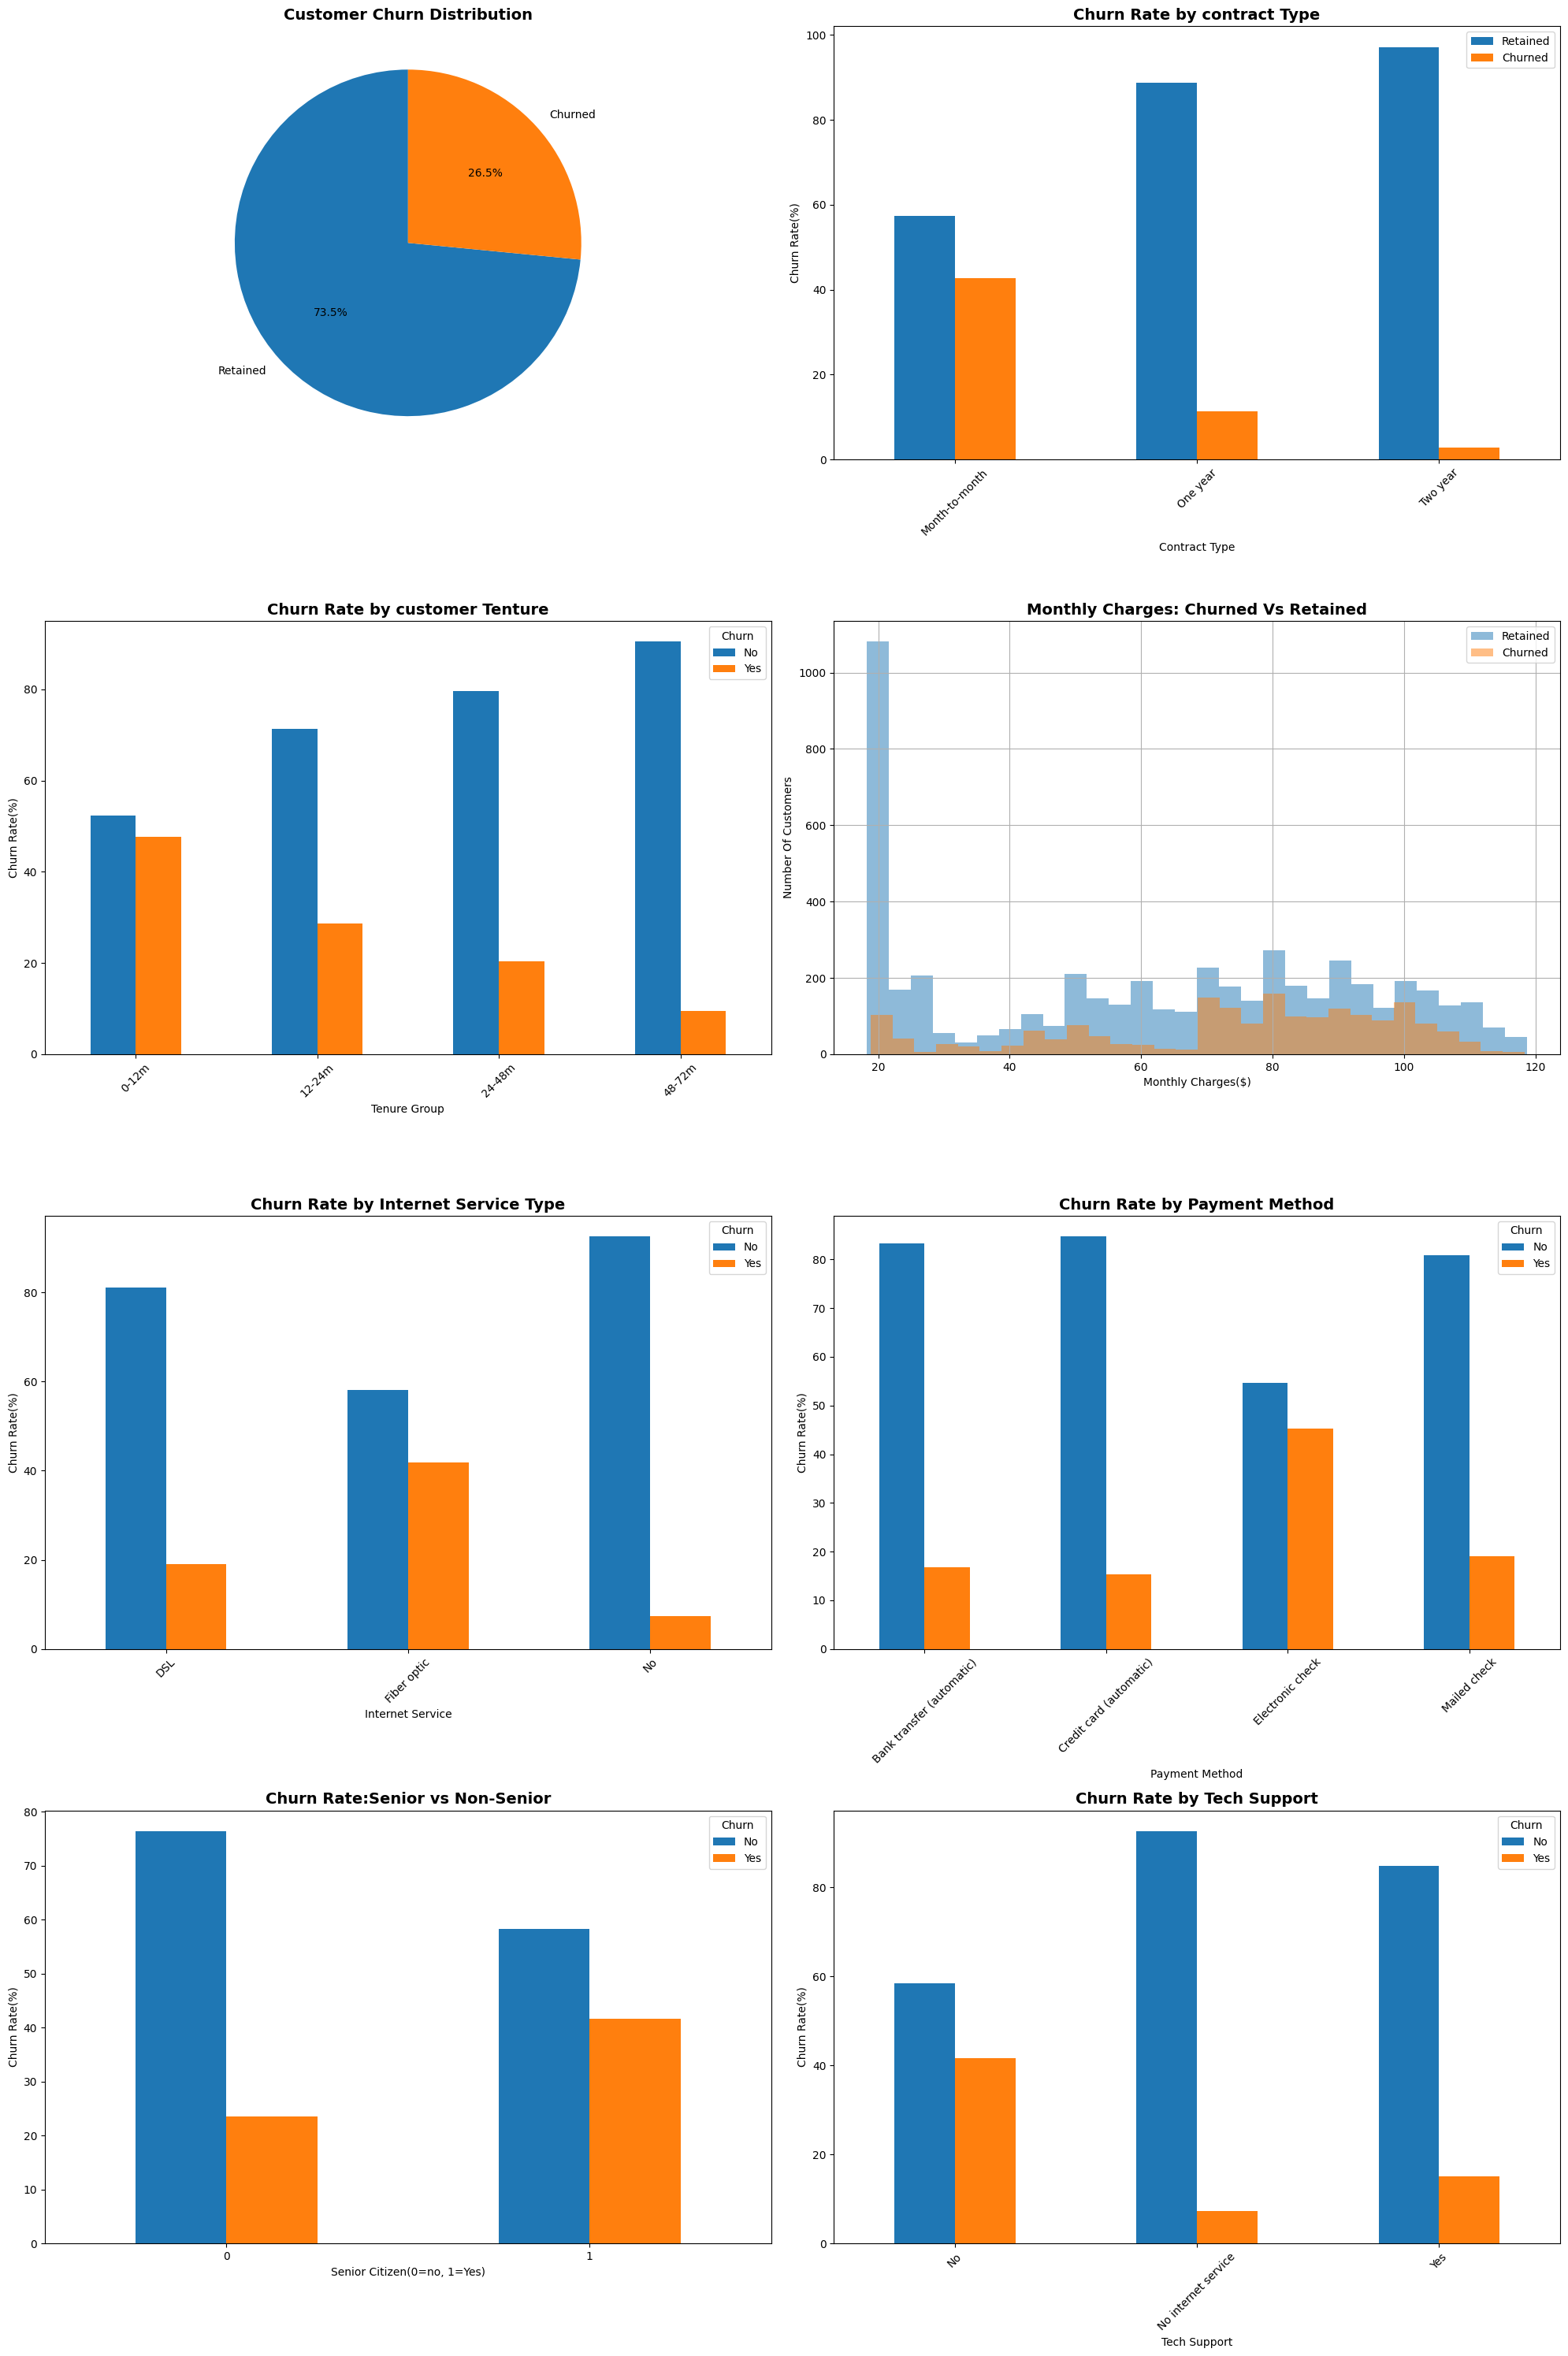

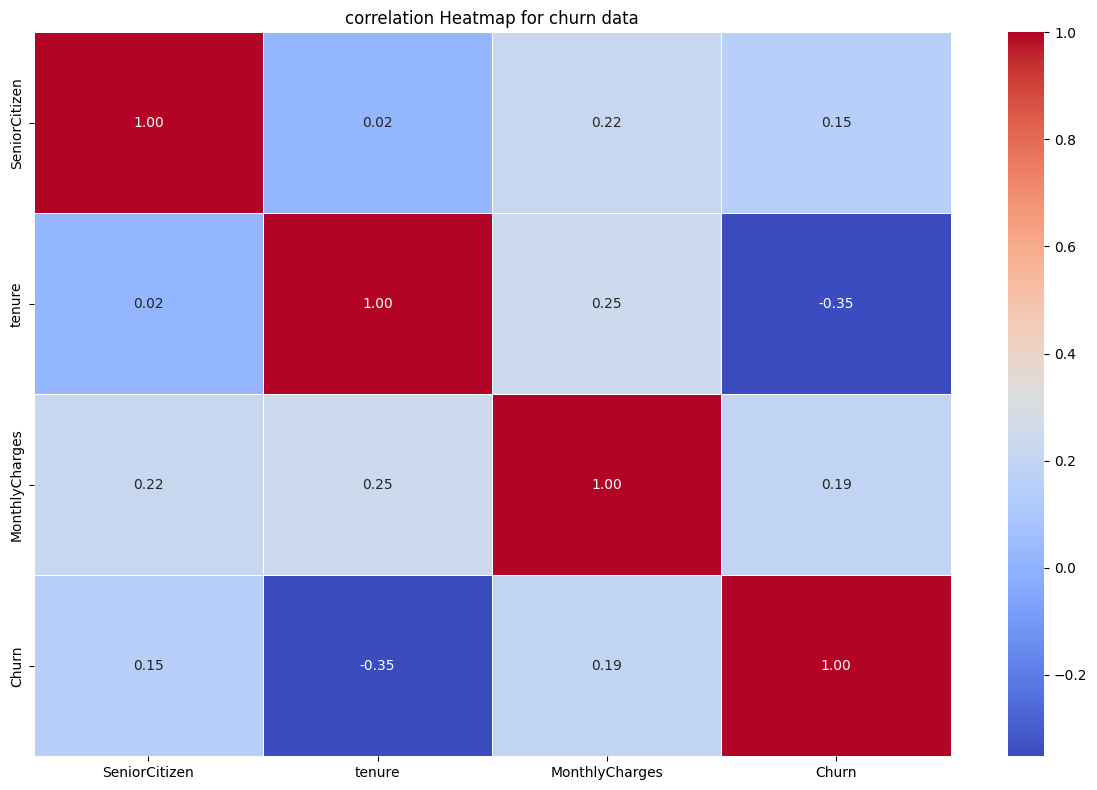

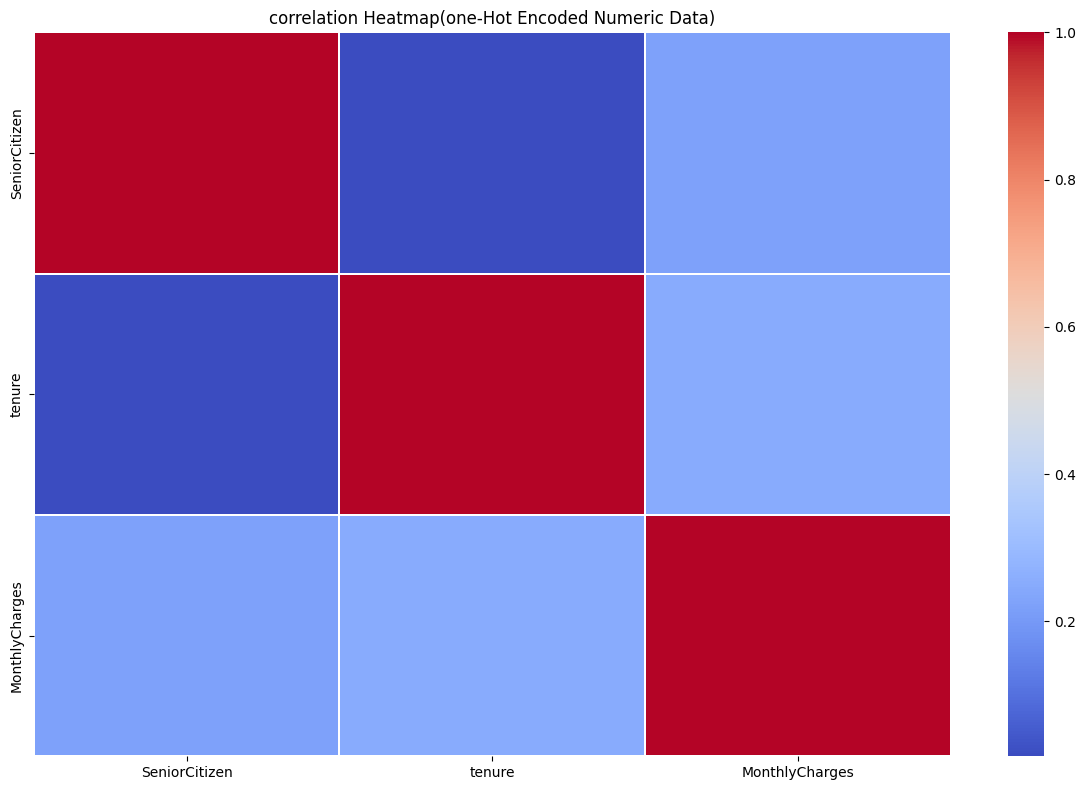

In [4]:
# Advanced visualization

fig= plt.figure(figsize=(20,30))

# 1.Churn Distribution
ax1= plt.subplot(4,2,1)
churn_counts=df['Churn'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.title ('Customer Churn Distribution', fontsize=14, fontweight='bold')

# 2.Churn by contract type (critical insight)
ax2= plt.subplot(4,2,2)
contract_churn= pd.crosstab(df['Contract'], df['Churn'], normalize='index')*100
contract_churn.plot (kind='bar', ax=ax2)
plt.title ('Churn Rate by contract Type', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate(%)')
plt.xlabel('Contract Type')
plt.xticks(rotation= 45)
plt.legend (['Retained', 'Churned'])

# 3.Churn by Tenture(Customer Lifecycle)
ax3= plt.subplot (4,2,3)
df['TenureGroup'] = pd.cut(df['tenure'],bins=[0,12,24,48, 72],labels= ['0-12m', '12-24m', '24-48m','48-72m'])
tenture_churn=pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index')*100
tenture_churn.plot(kind='bar', ax=ax3)
plt.title('Churn Rate by customer Tenture', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate(%)')
plt.xlabel('Tenure Group')
plt.xticks(rotation=45)

# 4.Monthly Charges Distribution by Churn
ax4= plt.subplot (4,2,4)
df[df['Churn']== 'No']['MonthlyCharges'].hist(bins=30, alpha=0.5, label='Retained')
df[df['Churn']== 'Yes']['MonthlyCharges'].hist(bins=30, alpha=0.5, label='Churned')
plt.title('Monthly Charges: Churned Vs Retained', fontsize=14, fontweight='bold')
plt.xlabel ('Monthly Charges($)')
plt.ylabel ('Number Of Customers')
plt.legend()

# 5. Churn by Internet Service
ax5= plt.subplot(4,2,5)
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')* 100
internet_churn.plot(kind='bar', ax=ax5)
plt.title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate(%)')
plt.xlabel('Internet Service')
plt.xticks(rotation=45)

# 6.Churn by Payment Method
ax6= plt.subplot(4,2,6)
payment_churn= pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')*100
payment_churn.plot(kind='bar', ax=ax6)
plt.title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate(%)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)

# 7.Senior Citizen Impact
ax7 = plt.subplot(4,2,7)
senior_churn = pd.crosstab(df['SeniorCitizen'],df['Churn'], normalize='index')*100
senior_churn.plot(kind='bar', ax=ax7)
plt.title('Churn Rate:Senior vs Non-Senior', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate(%)')
plt.xlabel('Senior Citizen(0=no, 1=Yes)')
plt.xticks(rotation=0)

# 8.Tech Support Impact
ax8= plt.subplot(4,2,8)
tech_churn =pd.crosstab(df['TechSupport'], df['Churn'], normalize='index')*100
tech_churn.plot(kind='bar',ax=ax8)
plt.title('Churn Rate by Tech Support', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate(%)')
plt.xlabel('Tech Support')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('Churn_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Map
numeric_df= df.select_dtypes(include= ['int64', 'float64'])
numeric_df['Churn']=df['Churn'].map({'Yes':1, 'No':0})
corr=numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("correlation Heatmap for churn data")
plt.tight_layout()
plt.savefig('correlation chart.png', dpi=300, bbox_inches='tight')
plt.show()

# correlation map with one-hot encoding numeric data
numeric_df['Churn']=df['Churn'].map({'Yes':1, 'No':0})
df=df.drop('customerId', axis=1, errors='ignore')
df_encodded = pd.get_dummies(df, drop_first=True)
numeric_df= df_encodded.select_dtypes(include= ['int64', 'float64'])
corr=numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.3)
plt.title("correlation Heatmap(one-Hot Encoded Numeric Data)")
plt.tight_layout()
plt.savefig('correlation chart with one-heat encoding.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
# Key Business insights from eda

print("\n" +"="*80)
print("KEY BUSINESS INSIGHTS")
print("="*80)

insights=[]

# Contract Type Insights
month_to_month_churn= df[df['Contract']== 'Month-to-month']['Churn'].value_counts(normalize=True)['Yes']*100
insights.append(f"1. CONTRACT RISK: Month-to-Month customers churn at {month_to_month_churn:.1f}% rate")

# Tenure Insights
new_customer_churn= df[df['tenure'] <= 12]['Churn'].value_counts(normalize=True)['Yes']*100
insights.append(f"\n2. ONBOARDING GAP: {new_customer_churn:.1f}% of new customers (<12 months)churn ")

# Tech Support Insight
no_tech_support_churn= df[df['TechSupport']=='No']['Churn'].value_counts(normalize=True)['Yes']*100
with_tech_support_churn= df[df['TechSupport']=='Yes']['Churn'].value_counts(normalize= True)['Yes']*100
insights.append(f"\n3. SERVICE VALUE: Customers without tech support churn at {no_tech_support_churn:.1f}% vs {with_tech_support_churn:.1f}% with support")

# Payment Method Insights
electronic_churn = df[df['PaymentMethod']== 'Electronic check'] ['Churn'].value_counts(normalize=True)['Yes']*100
insights.append (f"\n4. PAYMENT FRICTION: Electronic check users churn at {electronic_churn:.1f}%")

# Senior Citizen
senior_churn_rate = df[df['SeniorCitizen']==1]['Churn'].value_counts(normalize=True)['Yes']*100
insights.append (f"\n5. DEMOGRAPHIC RISK: Senior citizen churn at {senior_churn_rate:.1f}%")

for insight in insights:
    print(insight)


KEY BUSINESS INSIGHTS
1. CONTRACT RISK: Month-to-Month customers churn at 42.7% rate

2. ONBOARDING GAP: 47.4% of new customers (<12 months)churn 

3. SERVICE VALUE: Customers without tech support churn at 41.6% vs 15.2% with support

4. PAYMENT FRICTION: Electronic check users churn at 45.3%

5. DEMOGRAPHIC RISK: Senior citizen churn at 41.7%
